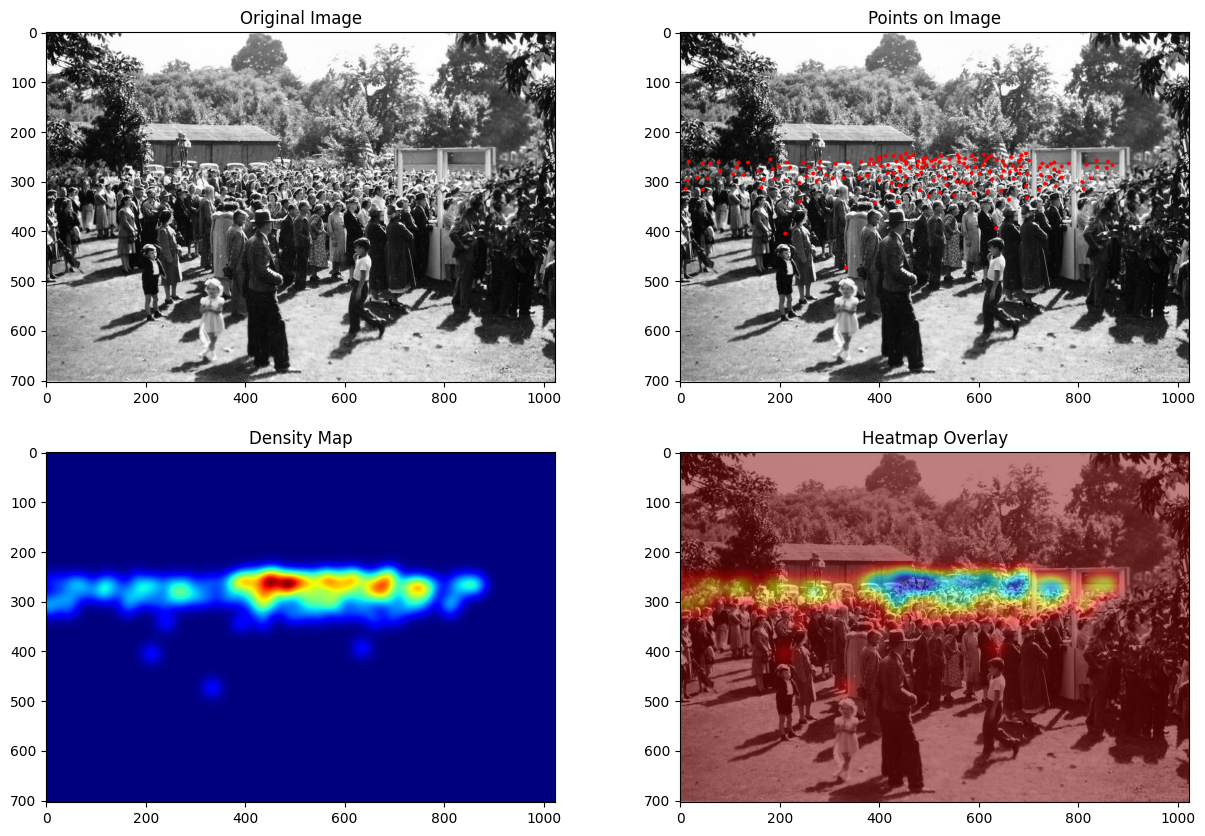

People Count: 172


In [1]:
import cv2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

img_path = r"C:/Users/Lenovo/Downloads/deep dataset/part_A_final/test_data/images/IMG_1.jpg"
gt_path  = r"C:/Users/Lenovo/Downloads/deep dataset/part_A_final/test_data/ground_truth/GT_IMG_1.mat"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

gt = scipy.io.loadmat(gt_path)
points_raw = gt["image_info"][0][0][0][0][0]

orig_h, orig_w = 768, 1024
scale_w = w / orig_w
scale_h = h / orig_h

points = []
for (x, y) in points_raw:
    points.append([int(x * scale_w), int(y * scale_h)])
points = np.array(points)
count = len(points)

density = np.zeros((h, w), dtype=np.float32)
for (x, y) in points:
    if 0 <= x < w and 0 <= y < h:
        density[int(y), int(x)] = 1

density_map = gaussian_filter(density, sigma=15)

img_points = img.copy()
for (x, y) in points:
    cv2.circle(img_points, (x, y), 4, (255, 0, 0), -1)

density_norm = (density_map / density_map.max() * 255).astype(np.uint8)
heatmap = cv2.applyColorMap(density_norm, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(img_points)
plt.title("Points on Image")

plt.subplot(2,2,3)
plt.imshow(density_map, cmap='jet')
plt.title("Density Map")

plt.subplot(2,2,4)
plt.imshow(overlay)
plt.title("Heatmap Overlay")

plt.show()

print("People Count:", count)



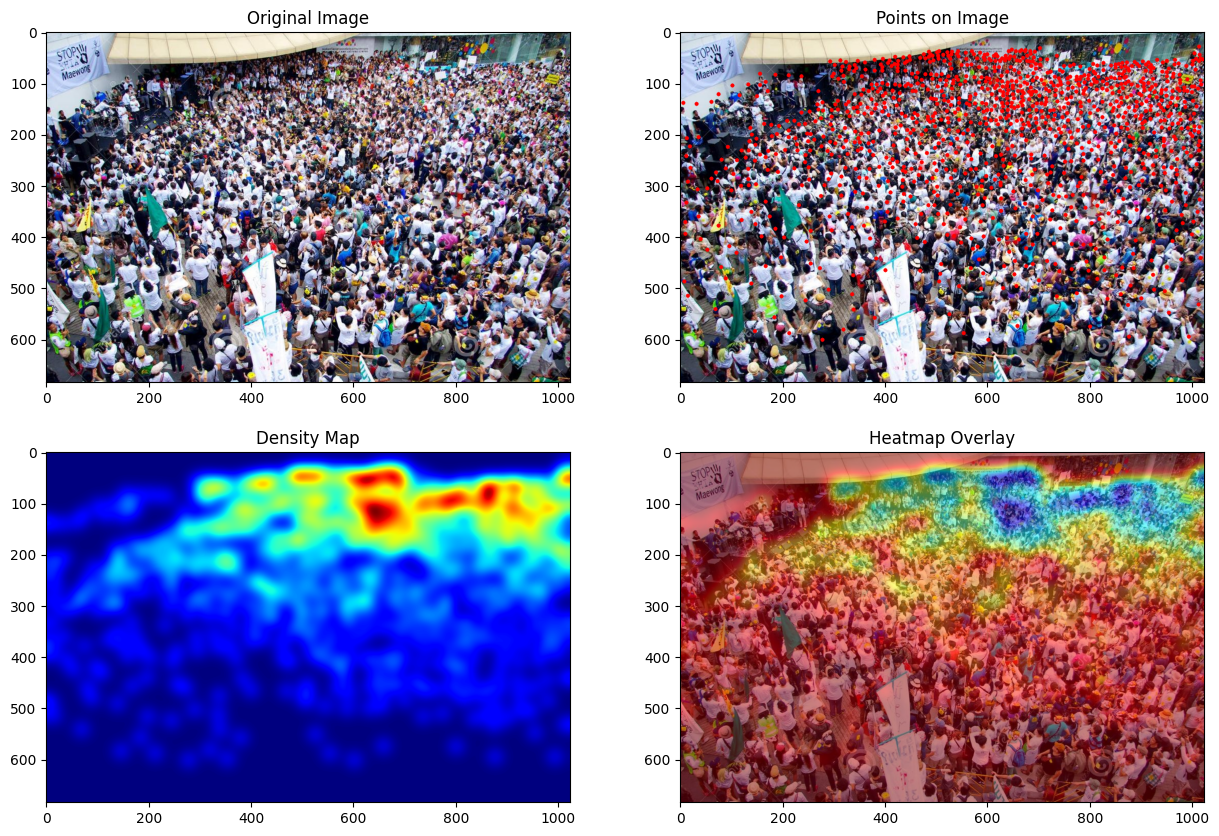

People Count: 1111


In [2]:
import cv2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

img_path = r"C:/Users/Lenovo/Downloads/deep dataset/part_A_final/test_data/images/IMG_2.jpg"
gt_path  = r"C:/Users/Lenovo/Downloads/deep dataset/part_A_final/test_data/ground_truth/GT_IMG_2.mat"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

gt = scipy.io.loadmat(gt_path)
points_raw = gt["image_info"][0][0][0][0][0]

orig_h, orig_w = 768, 1024
scale_w = w / orig_w
scale_h = h / orig_h

points = []
for (x, y) in points_raw:
    points.append([int(x * scale_w), int(y * scale_h)])
points = np.array(points)
count = len(points)

density = np.zeros((h, w), dtype=np.float32)
for (x, y) in points:
    if 0 <= x < w and 0 <= y < h:
        density[int(y), int(x)] = 1

density_map = gaussian_filter(density, sigma=15)

img_points = img.copy()
for (x, y) in points:
    cv2.circle(img_points, (x, y), 4, (255, 0, 0), -1)

density_norm = (density_map / density_map.max() * 255).astype(np.uint8)
heatmap = cv2.applyColorMap(density_norm, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(img_points)
plt.title("Points on Image")

plt.subplot(2,2,3)
plt.imshow(density_map, cmap='jet')
plt.title("Density Map")

plt.subplot(2,2,4)
plt.imshow(overlay)
plt.title("Heatmap Overlay")

plt.show()

print("People Count:", count)

